In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib import cm

from algorithms import *
from benchmark import *

# Definition of variables
# benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
benchmarkfunction_list = [Sphere, Perm, Bohachevsky] #Hartmann
algorithms_list        = [nelder_mead]


# Find the global minimum throughout the sampling process for model-based algorithms
def best_history(data):
    best = []
    for i,cd in enumerate(data):
        if (i == 0): best.append(cd)
        else:
            if (cd < best[-1]): best.append(cd)
            else: best.append(best[-1])
    return best

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.size"   : 16,
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

path = "/mnt/c/Users/poselin/Downloads/"


## Benchmark tests: label and legends included

Sphere | Sigma: 0 - Error: 0.25941827343523016
Sphere | Sigma: 0.001 - Error: 4.680410027835008
Sphere | Sigma: 0.0006 - Error: 1.9023204365275492
Perm | Sigma: 0 - Error: 0.11067916108303821
Perm | Sigma: 0.001 - Error: 0.7415189971403668
Perm | Sigma: 0.0006 - Error: 0.5881667426423931
Bohachevsky | Sigma: 0 - Error: 3.1279629575685366
Bohachevsky | Sigma: 0.001 - Error: 9.15608725354955
Bohachevsky | Sigma: 0.0006 - Error: 5.665465170193562


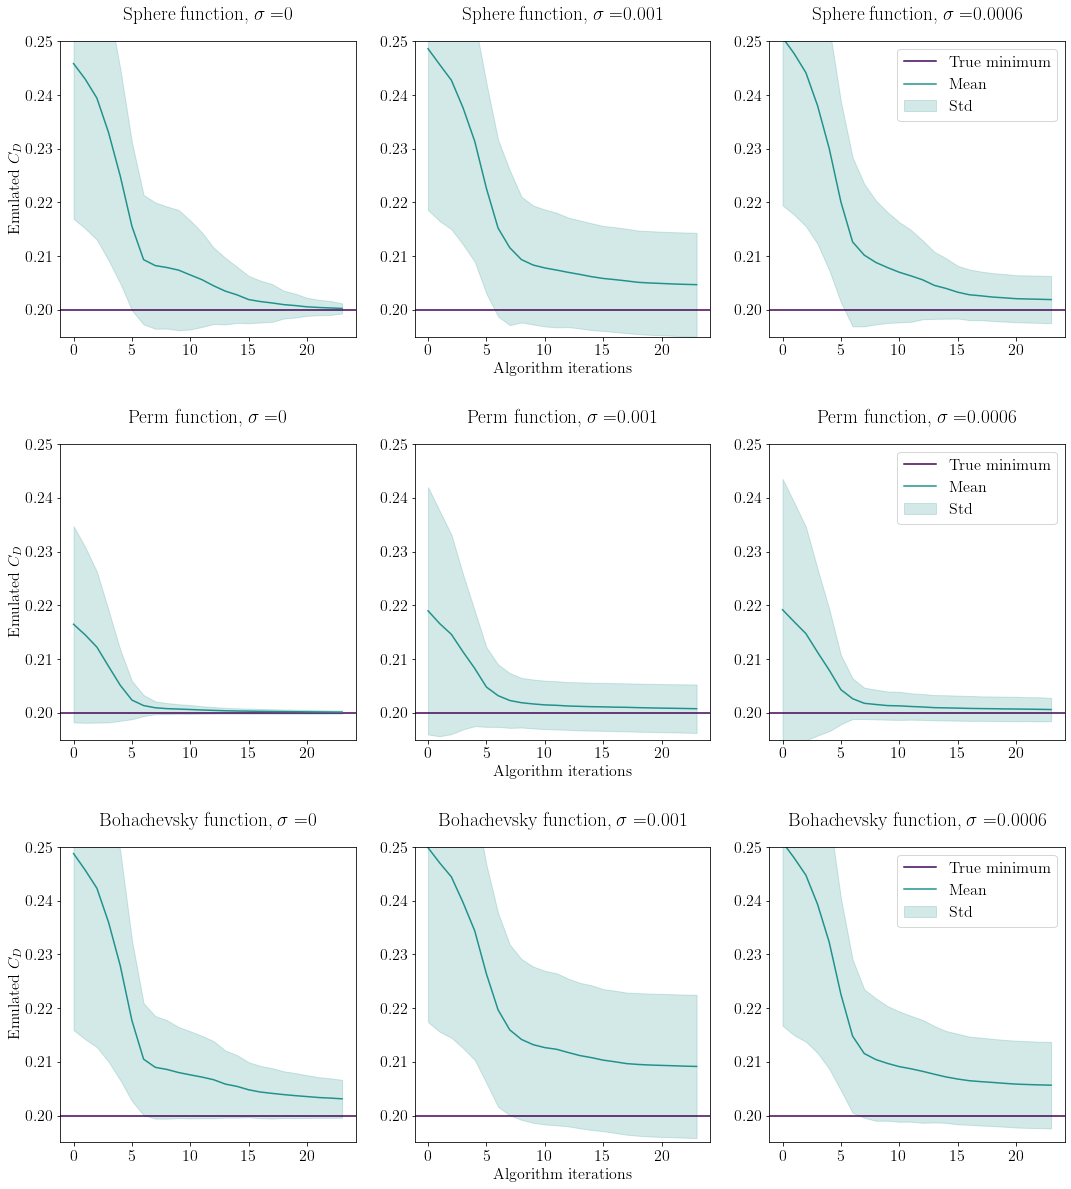

In [4]:
# Set the number of points to consider for each test
sampling_budget = 100

# Set the number of tests to run, on which estimate the standard deviation and mean
tests  = 250

X1 =  X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

sigmas = [0, 0.001, 0.0006]
for fi, optimizer in enumerate(algorithms_list):

    colors = cm.viridis(np.linspace(0, 1, 5))

    # Set the new plots
    fig, ax = plt.subplots(len(benchmarkfunction_list), len(sigmas), figsize=(6*len(benchmarkfunction_list), 7*len(sigmas)))

    for idx_b, fcn in enumerate(benchmarkfunction_list):

        for idx_s, sigma in enumerate(sigmas):
            # Estimate the function output
            Fx = fcn(points.T)

            # Rescaling the function to 0.20 - 0.35 range
            Fn = lambda p: (fcn(p) - np.min(Fx)) * (0.15)/(np.max(Fx) - np.min(Fx)) + 0.20 
            Fn_noise = lambda p: Fn(p) + np.random.normal(0, sigma)

            Y_log = []
            for test in range(tests):
                Xmin, Ymin, X, Y = optimizer(Fn_noise, sampling_budget=sampling_budget)
                #if (fi == 0): Y_log.append(best_history(Y))
                #else: Y_log.append(Y)
                Y_log.append(Y)
                
            Y_log = np.vstack(Y_log)

            Ystd  = np.std(Y_log, axis=0)
            Ymean = np.mean(Y_log, axis=0)

            true_min = np.min(Fn(points.T))
            # Plot the performances
            ax[idx_b, idx_s].axhline(y = true_min, color = colors[0], linestyle = '-')

            ax[idx_b, idx_s].plot(range(len(Ymean)), Ymean, color=colors[2])
            ax[idx_b, idx_s].fill_between(range(len(Ymean)), Ymean - Ystd, Ymean + Ystd, alpha=0.2, label='Standard Deviation', color=colors[2])
            ax[idx_b, idx_s].set_ylim([0.195, 0.25])
            ax[idx_b, idx_s].set_title(f"{fcn.__name__} function, $\sigma=${sigma}", y=1.05)
            if (idx_s == 1): ax[idx_b, idx_s].set_xlabel("Algorithm iterations")
            if (idx_s == 2): ax[idx_b, idx_s].legend(["True minimum", "Mean", "Std"])
            ax[idx_b, idx_s].set_box_aspect(1.0)
            
            if (idx_s == 0): ax[idx_b, idx_s].set_ylabel(r"Emulated $C_D$")
            print(f"{fcn.__name__} | Sigma: {sigma} - Error: {np.abs(Ymean[-1]-0.20)*1000}")

plt.savefig(path + 'Plot_averaging_time_effect.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()